# Projet TP théories de l'informmation et de l'incertain

## * Réalisé par: Yessin Msaddak - 1 ère idsd 1

### Importation des bibliothèques

In [53]:
import cv2
from skimage.util import random_noise
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [54]:
data = glob('data/*.jpg')

In [55]:
data

['data\\1.jpg',
 'data\\2.jpg',
 'data\\3.jpg',
 'data\\4.jpg',
 'data\\5.jpg',
 'data\\6.jpg',
 'data\\7.jpg',
 'data\\8.jpg',
 'data\\9.jpg']

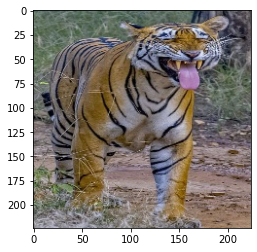

In [56]:
plt.imshow(plt.imread(data[6]))
plt.show()

### Quelques détailles sur l'une des image dont on travaille

In [57]:
image0 = cv2.imread(data[0])

In [58]:
image0

array([[[249, 245, 244],
        [249, 245, 244],
        [248, 244, 243],
        ...,
        [204, 199, 196],
        [216, 209, 206],
        [211, 204, 201]],

       [[248, 244, 243],
        [251, 247, 246],
        [253, 249, 248],
        ...,
        [217, 212, 209],
        [211, 204, 201],
        [214, 207, 204]],

       [[251, 249, 248],
        [251, 249, 248],
        [249, 247, 246],
        ...,
        [218, 213, 210],
        [213, 206, 203],
        [215, 208, 205]],

       ...,

       [[250, 250, 250],
        [255, 255, 255],
        [248, 248, 248],
        ...,
        [  6,  11,  14],
        [  7,  10,  14],
        [  0,   1,   5]],

       [[254, 252, 251],
        [254, 252, 251],
        [253, 251, 250],
        ...,
        [  9,  13,  18],
        [  2,   5,   9],
        [  0,   2,   6]],

       [[255, 255, 254],
        [255, 253, 252],
        [255, 253, 252],
        ...,
        [  7,  13,  18],
        [  0,   3,   7],
        [  0,   0,   4]]

In [59]:
image0.shape

(224, 224, 3)

In [60]:
image0.size

150528

In [61]:
image0.dtype

dtype('uint8')

### La mise des image dans une liste

In [62]:
images =[plt.imread(img) for img in data]

In [63]:
len(images)

9

In [64]:
type(images)

list

### Affichage multiple des images 

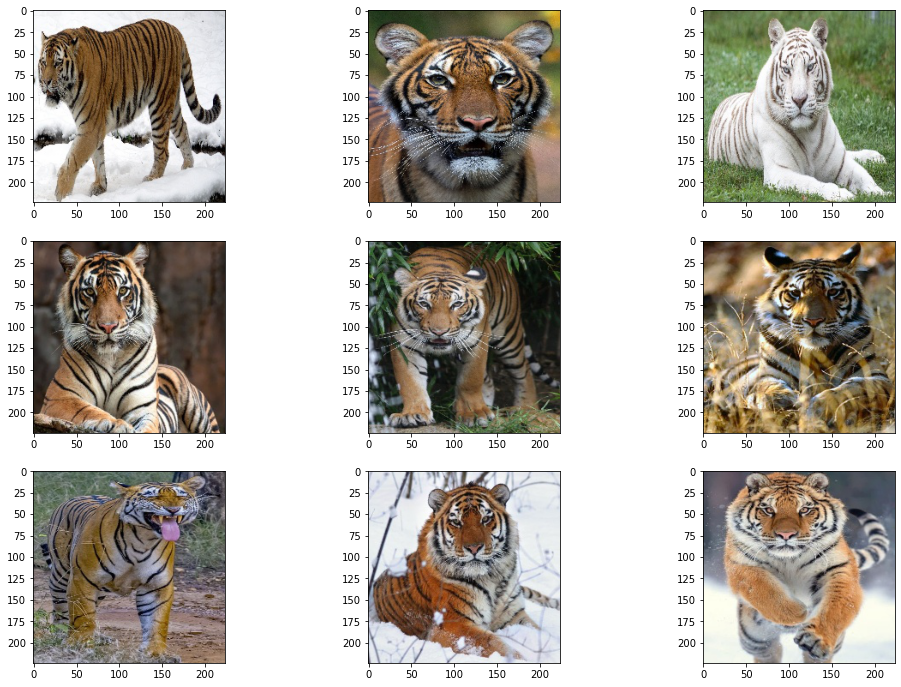

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,12))

for i, ax in enumerate(axes.flat):
    if i < 9:
        ax.imshow(images[i])

### Les histogrammes des images

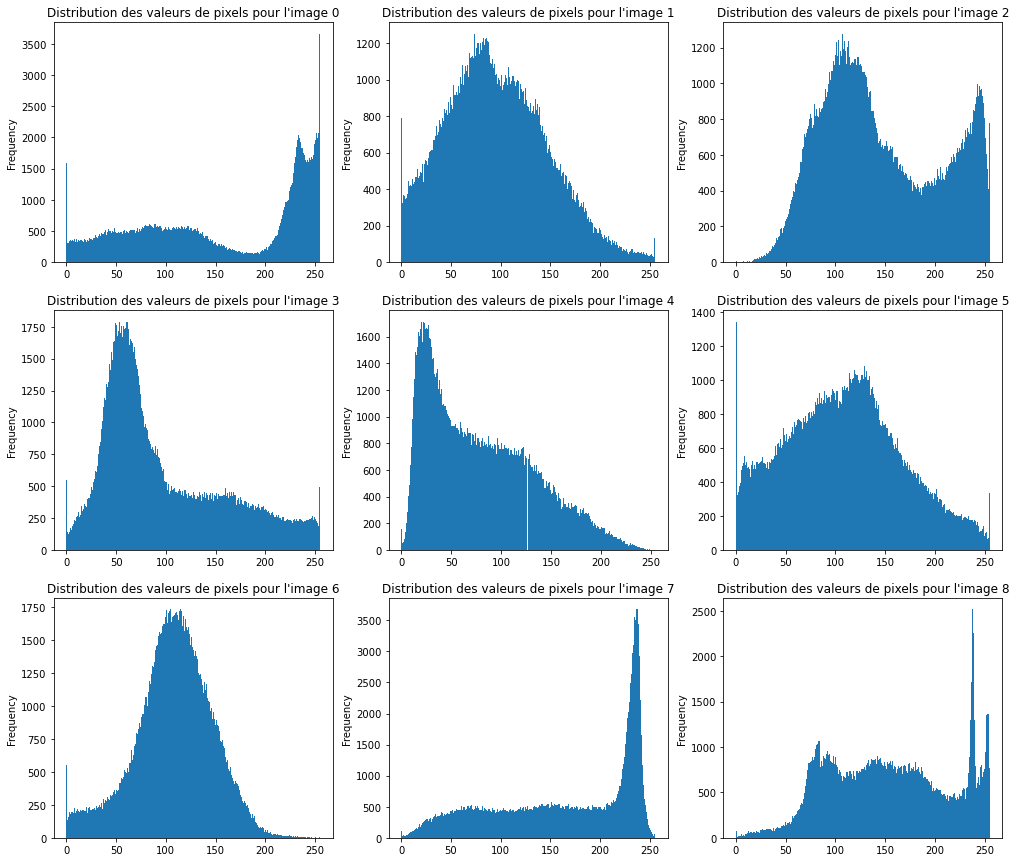

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 15))
for i, ax in enumerate(axes.flat):
    pd.Series(images[i].ravel()).plot(kind='hist', bins=256, ax=ax, title=f'Distribution des valeurs de pixels pour l\'image {i}')

### Les histogrammes des images séparées selon les matrices couleurs

In [71]:
def hist(image):
    blue_channel, green_channel, red_channel = cv2.split(image)
    plt.hist(red_channel.ravel(), 256, [0, 256], label="Bleu")
    plt.hist(green_channel.ravel(), 256, [0, 256], label="Orangé")
    plt.hist(blue_channel.ravel(), 256, [0, 256], label="Vert")
    plt.legend()

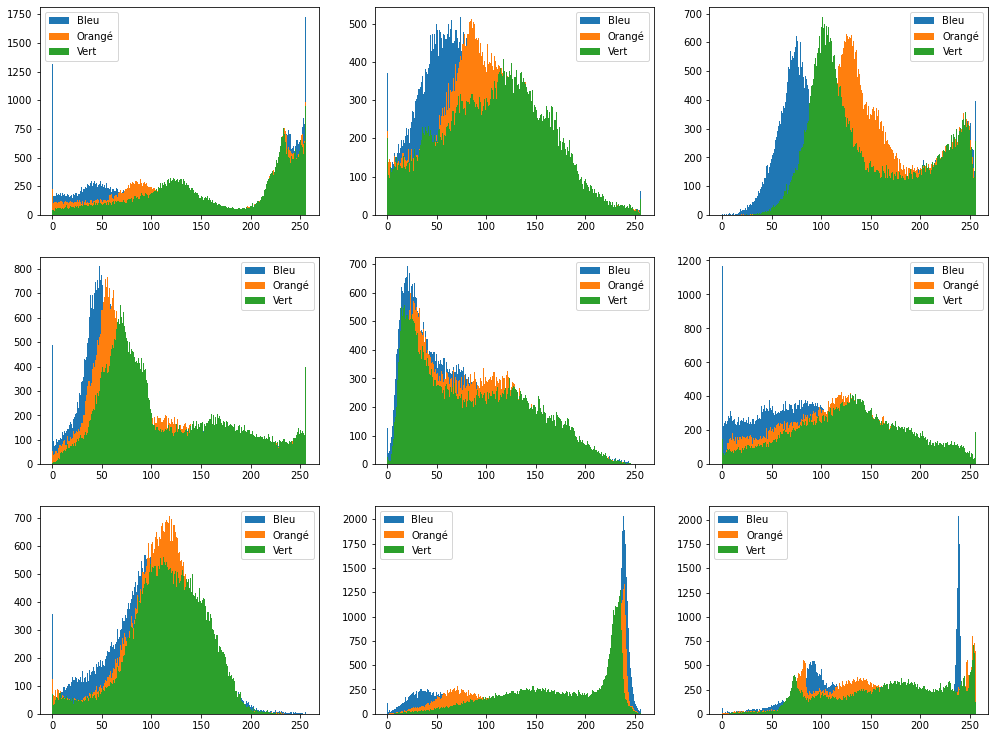

In [77]:
fig= plt.figure(figsize=(17,13))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    hist(images[i-1])

### Calcul de l'entropie de chacune des matrices couleurs pour chaque image

In [78]:
def entropy(img):
    # Création de l'histogramme de l'image
    histogram, _ = np.histogram(img, bins=256, range=[0, 256])
    # Normalisation de l'histogramme
    norm_histogram = histogram / float(img.size)
    # Élimination des valeurs nulles de l'histogramme
    non_zero_values = norm_histogram[norm_histogram != 0]
    # Calcul de l'entropie de Shannon
    entropy = -np.sum(non_zero_values * np.log2(non_zero_values))
    return entropy

In [82]:
for i in range(1, 10):
    MatB, MatG, MatR = cv2.split(images[i-1])
    print(f"Entropie du matrice bleu de l'image {i} :", entropy(MatB))
    print(f"Entropiedu matrice vert de l'image {i} :", entropy(MatG))
    print(f"Entropie du matrice rouge de l'image {i} :", entropy(MatR))
    print('\n')

Entropie du matrice bleu de l'image 1 : 7.584460275745897
Entropiedu matrice vert de l'image 1 : 7.593977931790148
Entropie du matrice rouge de l'image 1 : 7.45509614449998


Entropie du matrice bleu de l'image 2 : 7.723429802631978
Entropiedu matrice vert de l'image 2 : 7.548423307307546
Entropie du matrice rouge de l'image 2 : 7.49211115025271


Entropie du matrice bleu de l'image 3 : 7.448479533917679
Entropiedu matrice vert de l'image 3 : 7.386125670388807
Entropie du matrice rouge de l'image 3 : 7.648938712921386


Entropie du matrice bleu de l'image 4 : 7.68251560182149
Entropiedu matrice vert de l'image 4 : 7.601386335934096
Entropie du matrice rouge de l'image 4 : 7.499813517937922


Entropie du matrice bleu de l'image 5 : 7.612026541652369
Entropiedu matrice vert de l'image 5 : 7.487120575708595
Entropie du matrice rouge de l'image 5 : 7.41049082698835


Entropie du matrice bleu de l'image 6 : 7.835560051067122
Entropiedu matrice vert de l'image 6 : 7.763050554201952
Entropie 

### Images en niveau de gris

In [83]:
def affichage_image_gris(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')

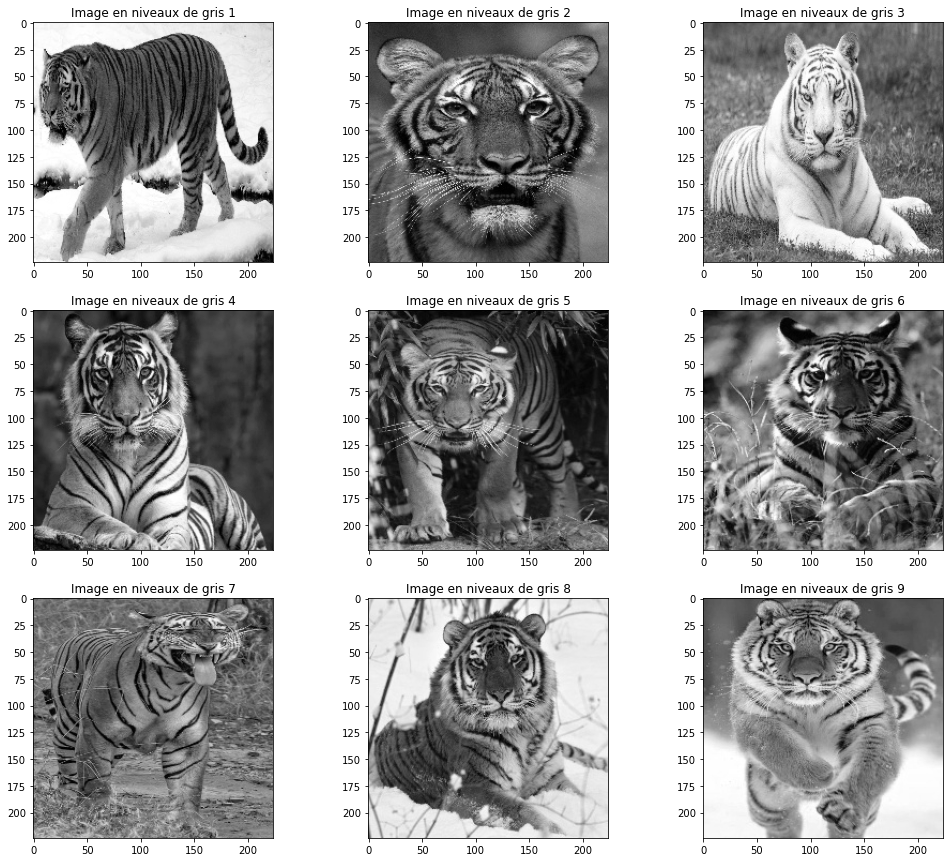

In [86]:
fig = plt.figure(figsize=(17,15))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    affichage_image_gris(images[i-1])
    plt.title(f"Image en niveaux de gris {i}")

### Entropies des: images normales / images en niveau de gris / matrices couleurs

In [97]:
Entropy = [entropy(images[i]) for i in range(9)]
Entropy_gray = [entropy(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)) for i in range(9)]
Blue = [entropy(cv2.split(images[i])[0]) for i in range(9)]
Green = [entropy(cv2.split(images[i])[1]) for i in range(9)]
Red = [entropy(cv2.split(images[i])[2]) for i in range(9)]

data = {
    'normal_image_entropy': Entropy,
    'greyscale_image_entropy': Entropy_gray,
    'Blue_channel_entropy': Blue,
    'Green_channel_entropy': Green,
    'Red_channel_entropy': Red
}

In [98]:
entropy_data = pd.DataFrame(data=data)

In [99]:
entropy_data

normal_image_entropy  greyscale_image_entropy  Blue_channel_entropy  \
0              7.618347                 7.579086              7.584460   
1              7.650042                 7.537041              7.723430   
2              7.673958                 7.458818              7.448480   
3              7.659208                 7.585133              7.682516   
4              7.538448                 7.468910              7.612027   
5              7.821239                 7.730318              7.835560   
6              7.288344                 7.173725              7.246444   
7              7.531404                 7.395604              7.377449   
8              7.698517                 7.547455              7.659945   

   Green_channel_entropy  Red_channel_entropy  
0               7.593978             7.455096  
1               7.548423             7.492111  
2               7.386126             7.648939  
3               7.601386             7.499814  
4               7.487121             7.410491  
5               7.763051             7.614665  
6               7.116010             7.379566  
7               7.453301             7.346799  
8               7.598332             7.421759

In [100]:
entropy_data.index += 1

In [101]:
entropy_data

normal_image_entropy  greyscale_image_entropy  Blue_channel_entropy  \
1              7.618347                 7.579086              7.584460   
2              7.650042                 7.537041              7.723430   
3              7.673958                 7.458818              7.448480   
4              7.659208                 7.585133              7.682516   
5              7.538448                 7.468910              7.612027   
6              7.821239                 7.730318              7.835560   
7              7.288344                 7.173725              7.246444   
8              7.531404                 7.395604              7.377449   
9              7.698517                 7.547455              7.659945   

   Green_channel_entropy  Red_channel_entropy  
1               7.593978             7.455096  
2               7.548423             7.492111  
3               7.386126             7.648939  
4               7.601386             7.499814  
5               7.487121             7.410491  
6               7.763051             7.614665  
7               7.116010             7.379566  
8               7.453301             7.346799  
9               7.598332             7.421759

### Application des flitres de bruit et les histogrammes de chaque filtre

In [103]:
def seuiller_image(image,threshold_value):
        gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        ret,thresh_img = cv2.threshold(gray_image,threshold_value,255,cv2.THRESH_BINARY)
        return thresh_img

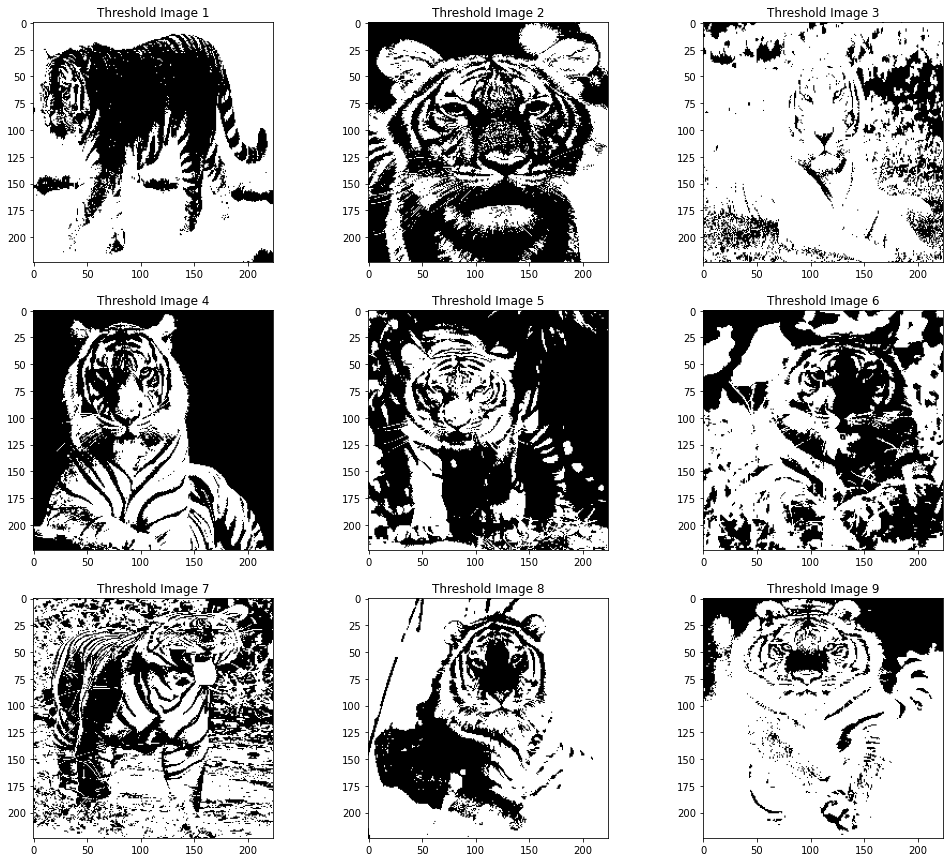

In [105]:
fig = plt.figure(figsize=(17,15))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    plt.imshow(seuiller_image(images[i-1],100),cmap='gray')
    plt.title(f'Threshold Image {i}')

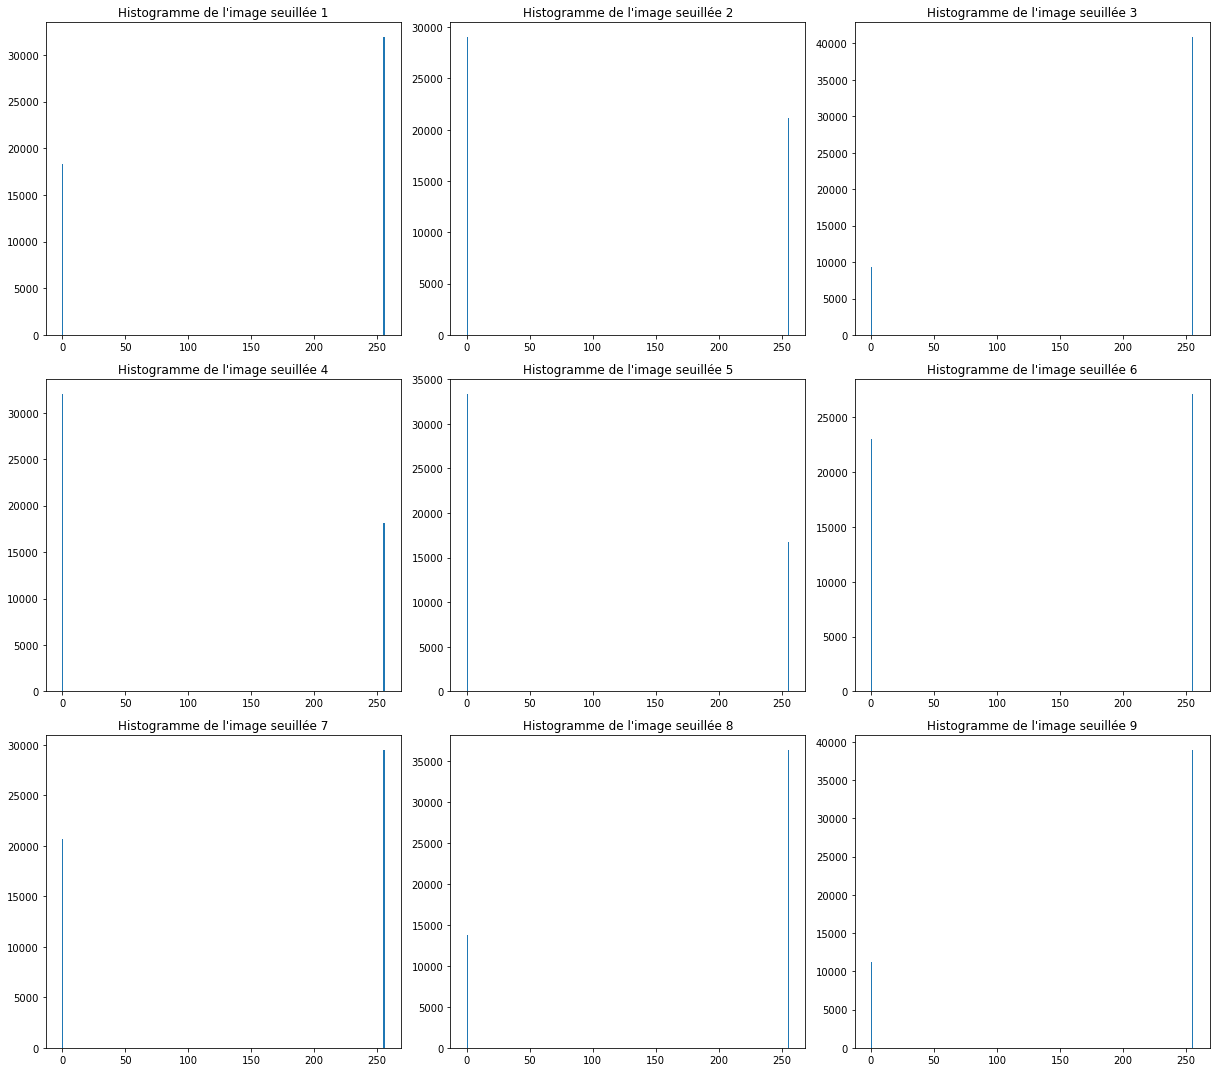

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 15))
axes = axes.ravel()
for i, ax in enumerate(axes):
    thresh_img = seuiller_image(images[i], 100)
    ax.hist(thresh_img.ravel(), bins=256, range=[0, 256])
    ax.set_title(f"Histogramme de l'image seuillée {i+1}")
plt.tight_layout()
plt.show()

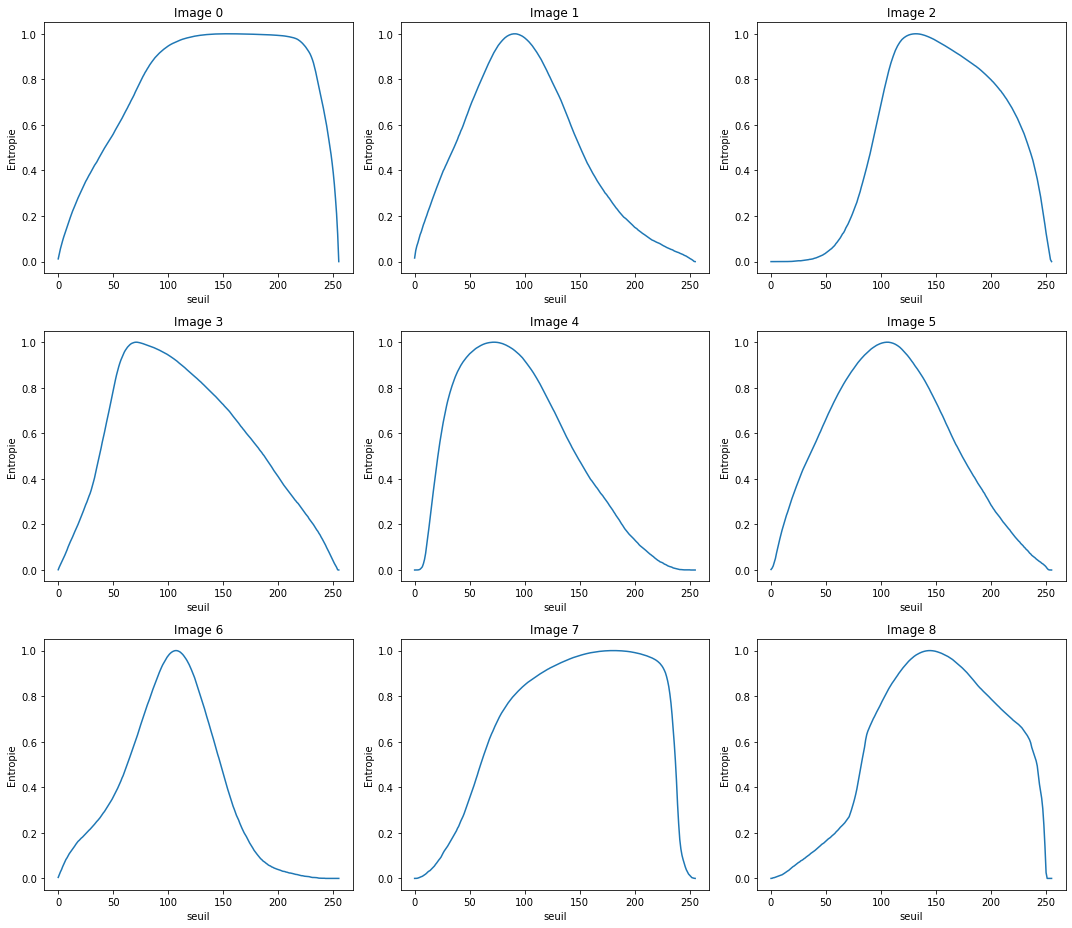

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

for i, ax in enumerate(axes.flat):
    entropies = []
    for j in range(256):
        gray_image = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        ret, img_thresh = cv2.threshold(gray_image, j, 255, cv2.THRESH_BINARY)
        entropies.append(entropy(img_thresh))
    ax.plot(range(256), entropies)
    ax.set_xlabel('seuil')
    ax.set_ylabel('Entropie')
    ax.set_title(f"Image {i}")
plt.tight_layout()

In [109]:
def bruit_gaussien(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    imB1 = random_noise(gray_image,mode='gaussian')
    return imB1

In [110]:
def bruit_poisson(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noisy_image = random_noise(gray_image, mode='poisson')
    return noisy_image

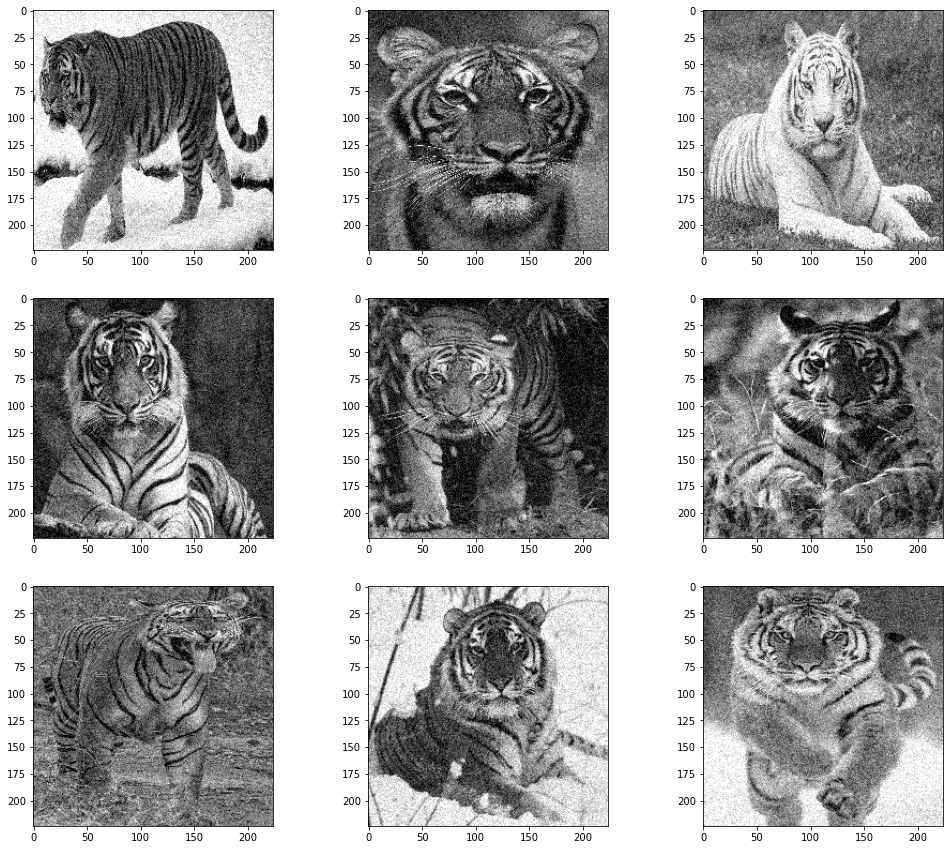

In [112]:
fig = plt.figure(figsize=(17,15))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(bruit_gaussien(images[i-1]),cmap='gray')

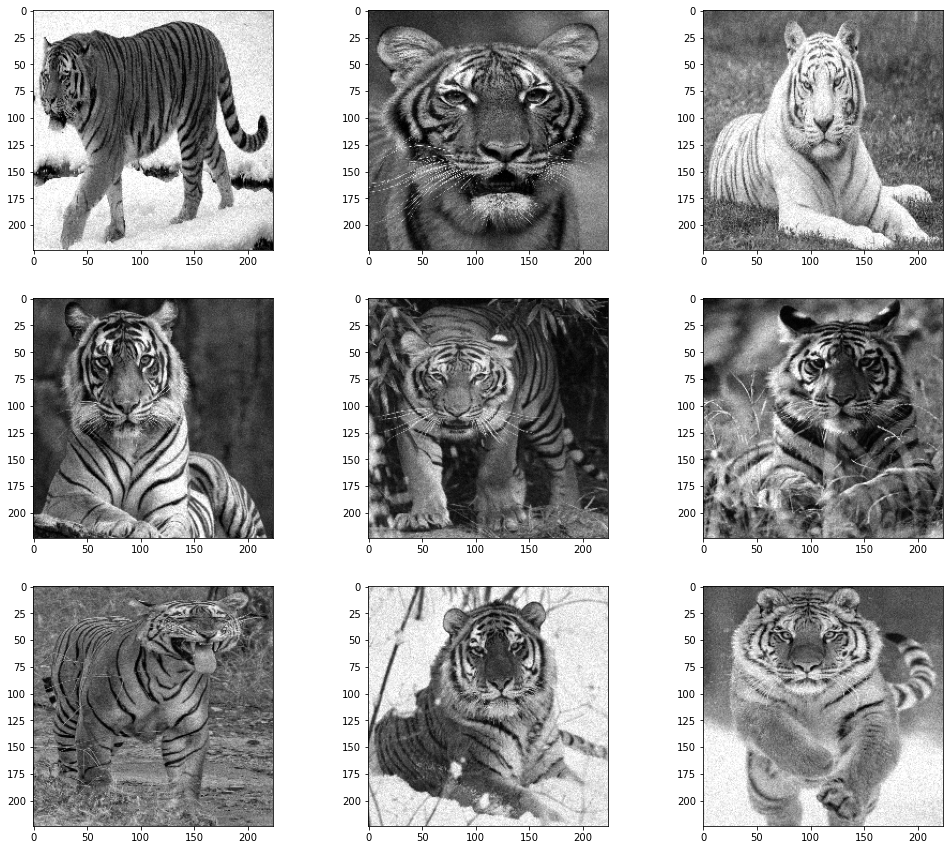

In [113]:
fig = plt.figure(figsize=(17,15))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(bruit_poisson(images[i-1]),cmap='gray')

In [116]:
def joint0_hist_display(image):
    # Création de la figure avec 3 sous-graphiques de taille 5x4
    fig, ax = plt.subplots(1, 3, figsize=(17, 15))

    # Conversion de l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcul de l'histogramme joint avec l'image originale
    joint_h0 = cv2.calcHist([gray_image, gray_image], [0, 1], None, [256, 256], [0, 256, 0, 256])

    # Affichage de l'histogramme joint avec l'image originale
    ax[0].imshow(joint_h0)
    ax[0].axis('off')

    # Ajout de bruit gaussien à l'image originale
    imb1 = np.array(255 * bruit_gaussien(image), dtype='uint8')

    # Calcul de l'histogramme joint avec l'image bruitée par le bruit gaussien
    joint_h1 = cv2.calcHist([gray_image, imb1], [0, 1], None, [256, 256], [0, 256, 0, 256])

    # Affichage de l'histogramme joint avec l'image bruitée par le bruit gaussien
    ax[1].imshow(joint_h1)
    ax[1].axis('off')

    # Ajout de bruit de Poisson à l'image originale
    imb2 = np.array(255 * bruit_poisson(image), dtype='uint8')

    # Calcul de l'histogramme joint avec l'image bruitée par le bruit de Poisson
    joint_h2 = cv2.calcHist([gray_image, imb2], [0, 1], None, [256, 256], [0, 256, 0, 256])

    # Affichage de l'histogramme joint avec l'image bruitée par le bruit de Poisson
    ax[2].imshow(joint_h2)
    ax[2].axis('off')

    # Affichage de la figure
    plt.show()

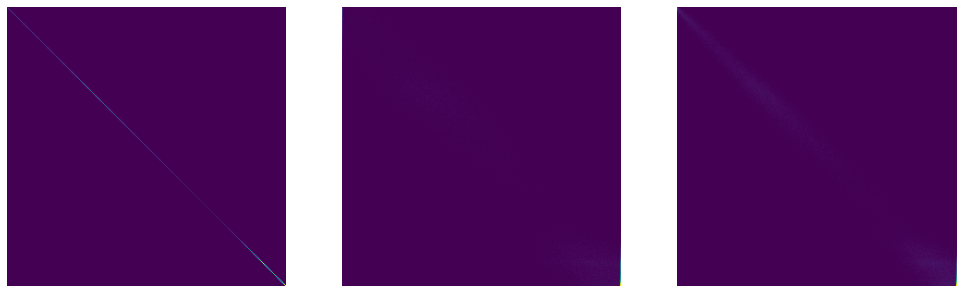

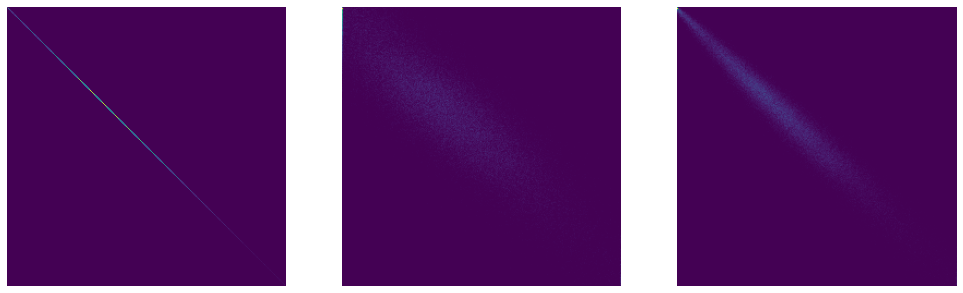

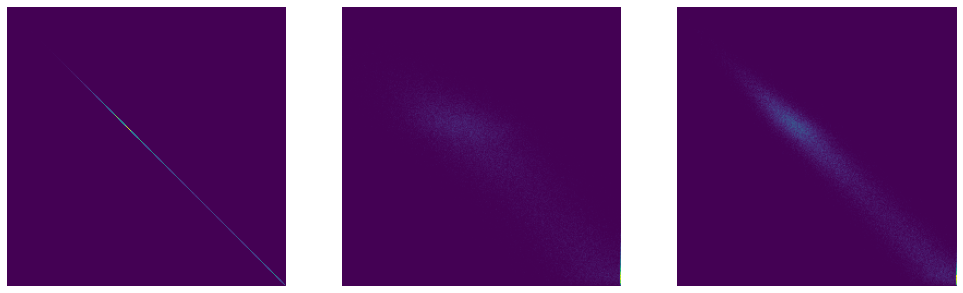

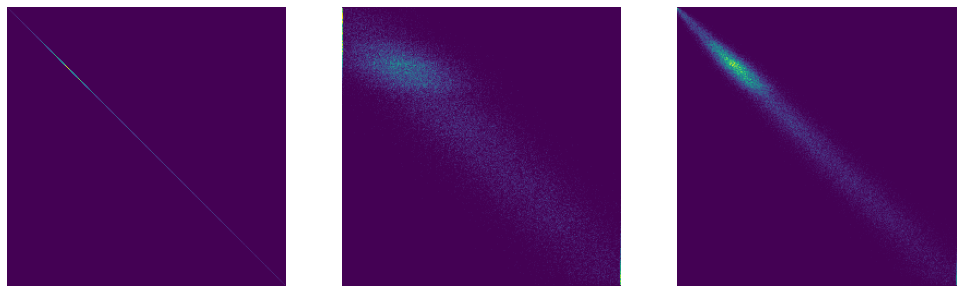

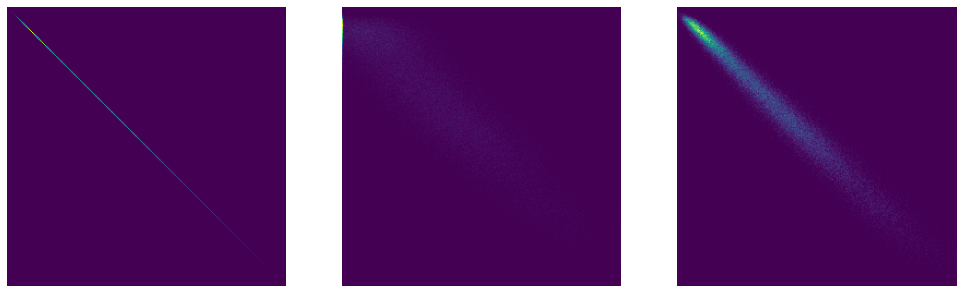

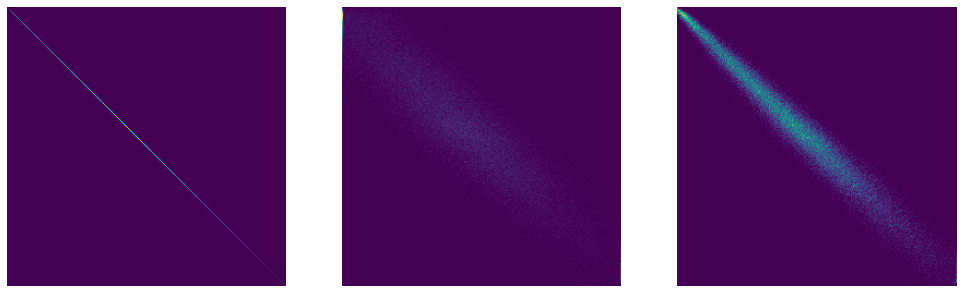

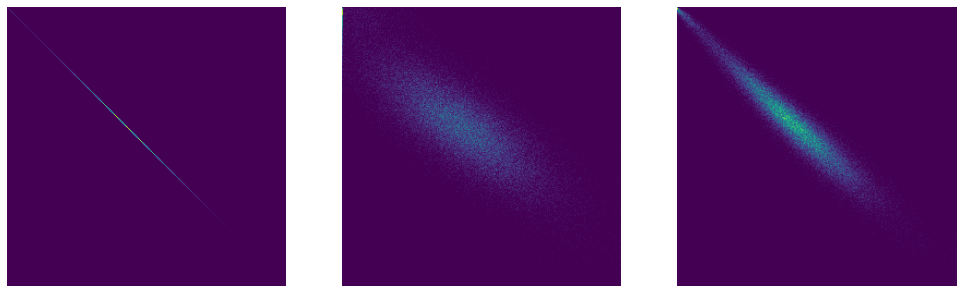

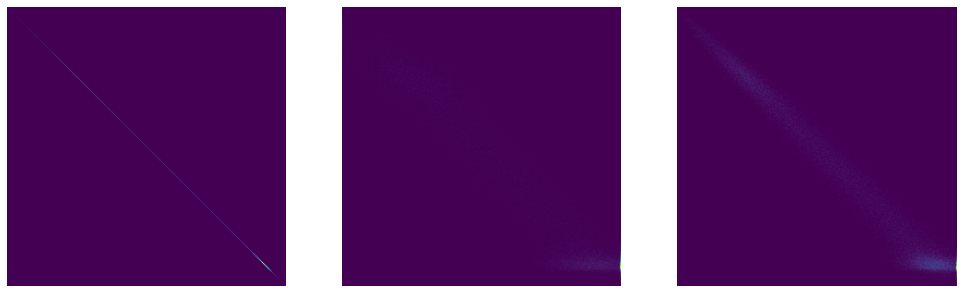

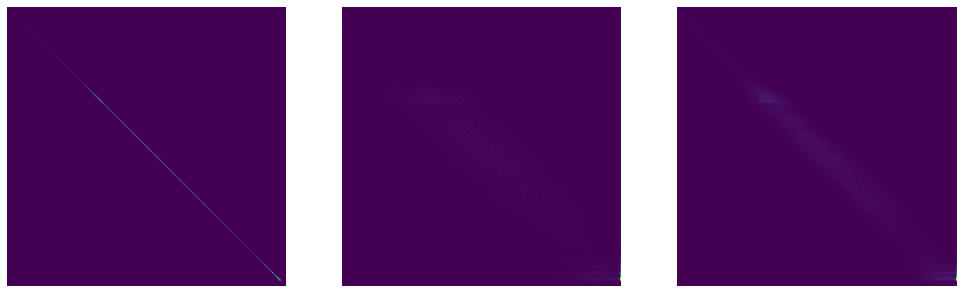

In [117]:
for i in range(1,10):
        joint0_hist_display(images[i-1])

# Fin du projet